## HW6b - Loops, Plots, Stats, and Data Analysis

### Problem 1: Gravity Drained Tanks

Cylindrical dual gravity drained tanks with a constant cross sectional area ($A_c=2 m^2$) and maximum height of 1 $m$. If the tank overfills, the excess fluid is lost. There is an inlet flow $q_{in}$, an intermediate outlet flow from tank 1 to tank 2 as $q_{out1}$, and a final outlet flow as $q_{out2}$. 

<img width="30%" src='https://apmonitor.com/pdc/uploads/Main/2tank_schematic.png'>

All flows are in units of $m^3/hr$ and heights are reported in units of $m$.
A mass balance on each tank is used to derive the following equations that relate inlet flow to the height of the tanks.

$A_c \frac{dh_1}{dt}=q_{in}-q_{out1}$

$A_c \frac{dh_2}{dt}=q_{out1}-q_{out2}$

The outlet flow rate for each tank depends on the height in the tank according to Bernoulli’s equation for incompressible fluids as:

$q_{out1}=c_1 \sqrt{h_1}$

$q_{out2}=c_2 \sqrt{h_2}$

The tanks are initially empty when the inlet to tank 1 starts to flow at a rate of 0.5 $m^3/hr$.

Solve for the heights ($h_1$ and $h_2$) as functions of time with $c_1$=0.13 and $c_2$=0.20. Use a timestep size of dt=0.5 $hr$ and solve up until a final time of t=10 $hr$. 

Plot the predicted heights $h_1$ and $h_2$ as functions of time on the same plot.  Label the axes as ```time (h)``` and ```height (m)```.

Hint: use an explicit Euler's equation applied to each $\frac{dh}{dt}$ above: $\frac{dh}{dt} = f(h,t)$

$h_{n+1} = h{n} + dt \, f(h_n,t_n)$

Don’t forget to add an IF statement to check for overfill conditions such as:

    if (height[i]>=1.0 and dheight_dt>=0):
        height[i+1] = 1.0
    else:
        height[i+1] = height[i] + dt * ( f(height[i], qin, qout1) )

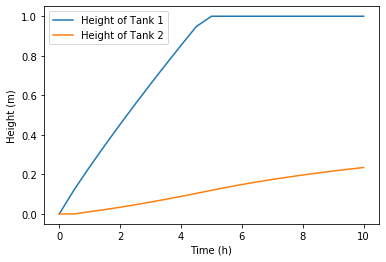

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def tank(c1,c2):
  Ac = 2 #constant Cross sectional area
  qin = 0.5 #Inlet Flow
  dt = 0.5  #timestep size
  tf = 10.0 #final time
  h1 = 0 #height of Tank1
  h2 = 0 #height of tank2
  t = 0 #time
  ts = np.empty(21) #timestep
  h1s = np.empty(21) #tank1 height at time
  h2s = np.empty(21) #tank2 height at time
  i = 0 #integer for while loop

  while t<=10.0:
     ts[i] = t #Change in time
     h1s[i] = h1 #Change in height 1
     h2s[i] = h2 #change in height 2 

     qout1 = c1 * pow(h1,0.5) #outflow 1
     qout2 = c2 * pow(h2,0.5) #outflow 2
     h1 = (qin-qout1)*dt/Ac + h1
     if h1>1: #check overfow conditions
        h1 = 1
     h2 = (qout1-qout2)*dt/Ac + h2
     i = i + 1
     t = t + dt

  plt.plot(ts,h1s, label="Height of Tank 1")
  plt.plot(ts,h2s, label="Height of Tank 2")
  plt.xlabel("Time (h)")
  plt.ylabel("Height (m)")
  plt.legend()

tank(0.13,0.20)

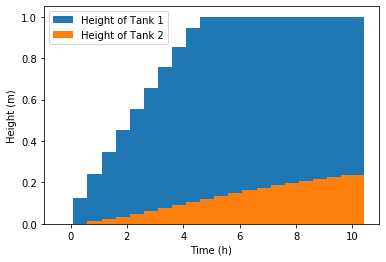

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def tank(c1,c2):
  Ac = 2 #constant Cross sectional area
  qin = 0.5 #Inlet Flow
  dt = 0.5  #timestep size
  tf = 10.0 #final time
  h1 = 0 #height of Tank1
  h2 = 0 #height of tank2
  t = 0 #time
  ts = np.empty(21) #timestep
  h1s = np.empty(21) #tank1 height at time
  h2s = np.empty(21) #tank2 height at time
  i = 0 #integer for while loop

  while t<=10.0:
     ts[i] = t #Change in time
     h1s[i] = h1 #Change in height 1
     h2s[i] = h2 #change in height 2 

     qout1 = c1 * pow(h1,0.5) #outflow 1
     qout2 = c2 * pow(h2,0.5) #outflow 2
     h1 = (qin-qout1)*dt/Ac + h1
     if h1>1: #check overfow conditions
        h1 = 1
     h2 = (qout1-qout2)*dt/Ac + h2
     i = i + 1
     t = t + dt

  plt.bar(ts,h1s, label="Height of Tank 1")
  plt.bar(ts,h2s, label="Height of Tank 2")
  plt.xlabel("Time (h)")
  plt.ylabel("Height (m)")
  plt.legend()

tank(0.13,0.20)